## Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("apples_and_oranges.csv")
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


## Splitting into X and Y

In [2]:
x=data[["Weight","Size"]]
y=data.Class

## Build and Train DTC

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predict

In [4]:
ypred=clf.predict(x)

## Evaluation Metrics

In [5]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,ypred)

array([[20,  0],
       [ 0, 20]], dtype=int64)

In [6]:
ypred

array(['orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'apple',
       'apple', 'apple', 'orange', 'apple', 'apple', 'apple', 'orange',
       'apple', 'orange', 'orange', 'apple', 'orange', 'apple', 'orange',
       'orange', 'orange', 'orange', 'orange', 'apple', 'orange',
       'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple',
       'orange', 'orange', 'orange', 'apple', 'apple', 'apple'],
      dtype=object)

## Plot Tree

[Text(167.4, 163.07999999999998, 'Size <= 4.93\ngini = 0.5\nsamples = 40\nvalue = [20, 20]\nclass = orange'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = apple'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = orange')]

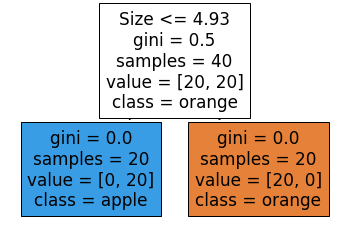

In [21]:
from sklearn.tree import plot_tree
plot_tree(clf,feature_names=["Weight","Size"],class_names=["orange","apple"],filled=True)

## Hyperparameter Tuning using GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
model=GridSearchCV(DecisionTreeClassifier(),
                param_grid={"criterion":["gini","entropy"],"splitter":['best','random']},
                   cv=5,verbose=True)

In [10]:
best_model=model.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished


## Plot DT of GridSearch Model

In [11]:
best_model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'Size <= 4.93\ngini = 0.5\nsamples = 40\nvalue = [20, 20]\nclass = orange'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = apple'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = orange')]

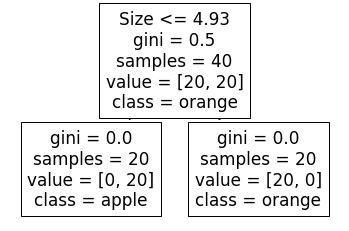

In [12]:
from sklearn.tree import plot_tree
plot_tree(best_model.best_estimator_,feature_names=["Weight","Size"],class_names=["orange","apple"])

## To get Decision Rules

In [19]:
from sklearn.tree import export_text
r=export_text(best_model.best_estimator_,feature_names=["Weight","Size"])

In [20]:
print(r)

|--- Size <= 4.93
|   |--- class: orange
|--- Size >  4.93
|   |--- class: apple

